# Machine Learning Zoomcamp

## Home work week two

Questions: https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.md

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 999

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
airbnb_data = pd.read_csv('data/airbnb_data/AB_NYC_2019.csv')

In [3]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='price', ylabel='Count'>

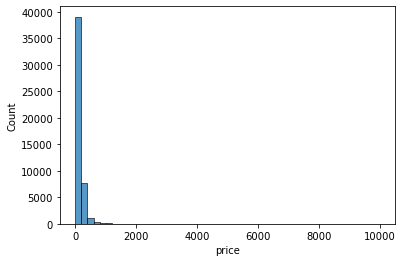

In [4]:
sns.histplot(airbnb_data['price'], bins=50)

The price has a long tail with a few very high values but most under 200. Let's zoom in slightly.

<AxesSubplot:xlabel='price', ylabel='Count'>

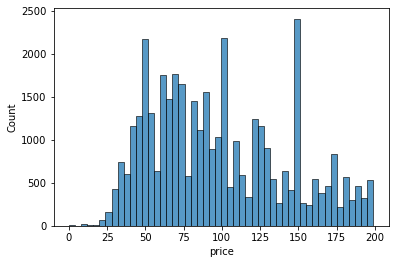

In [5]:
sns.histplot(airbnb_data[airbnb_data['price'] < 200].price, bins=50)

In [6]:
columns = [
    'latitude',
    'longitude',
    'price', 
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [7]:
base_features = [
    'latitude',
    'longitude',
#     'price', EDIT I had left the price in here so it was being added in the training dataframes
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [8]:
df = airbnb_data.copy()[columns]
len(df)

48895

In [9]:
df.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Question 1: missing features

In [10]:
df.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2: Median for minimum nights

In [11]:
df['minimum_nights'].median()

3.0

In [12]:
np.random.seed(42)

n = len(df)

idx = np.arange(n)
np.random.shuffle(idx)

In [13]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
def split_data(idx):
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [15]:
df_train, df_val, df_test, y_train, y_val, y_test = split_data(idx)

In [16]:
def prepare_X_fill_nan_with_zero(df):
    df_num = df[base_features]       
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


def prepare_X_fill_nan_with_mean(df):
    df_num = df[base_features]
    mean_reviews_per_month = df_num['reviews_per_month'].mean()
    df_num['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)
    X = df_num.values
    return X


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


def rmse(y, y_pred):
    err = y - y_pred
    se = err ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Question 3: should we fill na values with 0 or the mean

#### Option 1 fill na with zero

In [17]:
X_train = prepare_X_fill_nan_with_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_fill_nan_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.64

#### Option 1 fill na with mean

In [18]:
X_train = prepare_X_fill_nan_with_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_fill_nan_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0.64

🔍 when rounded they return the same score, however before rounding filling the na values with 0 gave a slightly better score.

### Question 4: Which is the best amount of regularisation for this model?

In [19]:
def prepare_X(df):
    df_num = df[base_features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


def train_linear_regression_regularised(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [20]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_regularised(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(f' regularisation: {r}, bias term: {round(w0, 2)}, score: {round(score, 2)}')

 regularisation: 0, bias term: -419.91, score: 0.64
 regularisation: 1e-06, bias term: -419.86, score: 0.64
 regularisation: 0.0001, bias term: -414.98, score: 0.64
 regularisation: 0.001, bias term: -375.27, score: 0.64
 regularisation: 0.01, bias term: -191.78, score: 0.66
 regularisation: 0.1, bias term: -32.56, score: 0.68
 regularisation: 1, bias term: -3.5, score: 0.68
 regularisation: 5, bias term: -0.7, score: 0.68
 regularisation: 10, bias term: -0.35, score: 0.68


🔍 Adding zero regularisation still gives us the best score, so regularisation is not required.

### Question 5: What seed value gives us the best results?

In [21]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)
    
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(idx)
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_regularised(X_train, y_train, r=0.000001)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    scores.append(score)
    
    print(f' regularisation: {r}, bias term: {round(w0, 2)}, score: {round(score, 2)}')

 regularisation: 10, bias term: -8.42, score: 0.7
 regularisation: 10, bias term: 4.86, score: 0.7
 regularisation: 10, bias term: 5.79, score: 0.69
 regularisation: 10, bias term: 0.32, score: 0.69
 regularisation: 10, bias term: -5.23, score: 0.69
 regularisation: 10, bias term: -2.52, score: 0.68
 regularisation: 10, bias term: 10.97, score: 0.68
 regularisation: 10, bias term: 11.08, score: 0.7
 regularisation: 10, bias term: 12.21, score: 0.7
 regularisation: 10, bias term: 3.7, score: 0.69


In [22]:
round(np.std(scores),3)

0.008

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

### Question 6: What is our final RMSE?

In [23]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

df_train, df_val, X_test, y_train, y_val, y_test = split_data(idx)

full_train = pd.concat([df_train, df_val])
full_train = full_train.reset_index(drop=True) # we reset the index here as we still have the index from the validation data
full_y = np.concatenate([y_train, y_val])

r = 0.001
X_train = prepare_X(full_train)
w0, w = train_linear_regression_regularised(X_train, full_y, r=r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,2)

0.74

I forgot to remove the price values from my X train data so my model was overfitting. Below is the corrected version!

In [24]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

df_train, X_val, df_test, y_train, y_val, y_test = split_data(idx)
del df_train['price']
del df_test['price']

full_train = pd.concat([df_train, df_val])
full_train = full_train.reset_index(drop=True) # we reset the index here as we still have the index from the validation data
full_y = np.concatenate([y_train, y_val])

r = 0.001
X_train = prepare_X(full_train)
w0, w = train_linear_regression_regularised(X_train, full_y, r=r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,2)

0.65

**ANSWER SHEET:** https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.ipynb